>## Importing Packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

### Step2: Load DataSet

In [2]:
df=pd.read_csv("heart_data.csv")
df.head(4)

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,male,39,No,0.0,No,No,No,No,195.0,106.0,70.0,26.97,80.0,77.0,No
1,female,46,No,0.0,No,No,No,No,250.0,121.0,81.0,28.73,95.0,76.0,No
2,male,48,Yes,20.0,No,No,No,No,245.0,127.5,80.0,25.34,75.0,70.0,No
3,female,61,Yes,30.0,No,No,Yes,No,225.0,150.0,95.0,28.58,65.0,103.0,Yes


1. gender – Specifies whether the individual is male or female (0 = Female, 1 = Male).
2. age – Age of the individual in years.
3. currentSmoker – Indicates whether the person is currently a smoker (1 = Yes, 0 = No).
4. cigsPerDay – Number of cigarettes smoked per day (if the person is a smoker).
5. BPMeds – Whether the person is on blood pressure medication (1 = Yes, 0 = No).
6. prevalentStroke – History of stroke ( brain attack) (1 = Yes, 0 = No).
7. prevalentHyp – Presence of hypertension (high blood pressure) (1 = Yes, 0 = No).
8. diabetes – Indicates if the person has diabetes (1 = Yes, 0 = No).
9. totChol – Total cholesterol is a type of lipid (fat) level in mg/dL.
10. sysBP – Systolic blood is a pressure in your arteries when your heart beats and pumps blood out to your body. (upper reading) in mmHg.
11. diaBP – Diastolic blood is a pressure in your arteries when your heart is at rest (lower reading) in mmHg.
12. BMI – Body Mass Index (weight in kg/m²).
13. heartRate – Resting heart rate in beats per minute.
14. glucose – Glucose level in blood (mg/dL).
15. TenYearCHD – Indicates if the person is at risk of coronary heart disease (CHD) within 10 years (1 = Yes, 0 = No).

### Step3: Data Processing 
Perform data preprocessing tasks such as handling missing values , encoding categorical values , and feature scaling 

In [3]:
df.shape

(4240, 15)

In [4]:
df.isnull().sum()

gender               0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

##### There are total 6 columns in which values are missing  in the dataset
##### 1 is categorical
##### 5 is numerical

In [5]:
df.isnull().sum().sum()

np.int64(540)

>##### Total 540 values are missing in the dataframe 

In [6]:
## Filling the categorical values with the most frequent value (Mode)

mode_value = df['BPMeds'].mode()[0]                 # mode()[0]: Retrieves the first value from the list of modes
df['BPMeds'] = df['BPMeds'].fillna(mode_value)      # fillna(): Fills missing values . 

In [7]:
## Filling the Numerical values with the middle value when the data is sorted (Median)
numeric_cols = [ "cigsPerDay", "totChol" ,"BMI" , "heartRate" , "glucose"]
for col in numeric_cols:
    median_value = df[col].median()
    df[col].fillna( median_value, inplace=True)

In [8]:
df.isnull().sum()

gender             0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [9]:
df["TenYearCHD"].value_counts()

TenYearCHD
No     3596
Yes     644
Name: count, dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4240 entries, 0 to 4239
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           4240 non-null   object 
 1   age              4240 non-null   int64  
 2   currentSmoker    4240 non-null   object 
 3   cigsPerDay       4240 non-null   float64
 4   BPMeds           4240 non-null   object 
 5   prevalentStroke  4240 non-null   object 
 6   prevalentHyp     4240 non-null   object 
 7   diabetes         4240 non-null   object 
 8   totChol          4240 non-null   float64
 9   sysBP            4240 non-null   float64
 10  diaBP            4240 non-null   float64
 11  BMI              4240 non-null   float64
 12  heartRate        4240 non-null   float64
 13  glucose          4240 non-null   float64
 14  TenYearCHD       4240 non-null   object 
dtypes: float64(7), int64(1), object(7)
memory usage: 497.0+ KB


In [11]:
df.describe()

,age,cigsPerDay,totChol,sysBP,diaBP,BMI,heartRate,glucose
count,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000,4240.000000
mean,49.580189,8.944340,236.667689,132.354599,82.897759,25.799005,75.878774,81.600943
std,8.572942,11.904777,44.328480,22.033300,11.910394,4.070775,12.023937,22.860340
min,32.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000
25%,42.000000,0.000000,206.000000,117.000000,75.000000,23.077500,68.000000,72.000000
50%,49.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000
75%,56.000000,20.000000,262.000000,144.000000,90.000000,28.032500,83.000000,85.000000
max,70.000000,70.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000


In [12]:
df.duplicated().sum()

np.int64(0)

>##### No duplicates values in the data set

## Perform the some basic visulaization on the dataset
"" TO understand the pattern and trends in the dataset""

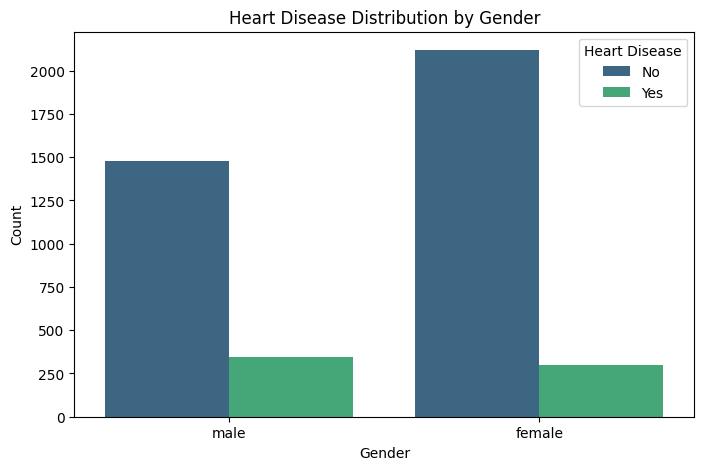

In [13]:
# This graph helps you compare how many men and women have heart disease versus how many don't.
plt.figure(figsize=(8,5))
sns.countplot(x='gender', hue='TenYearCHD', data=df, palette='viridis')
plt.title('Heart Disease Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()

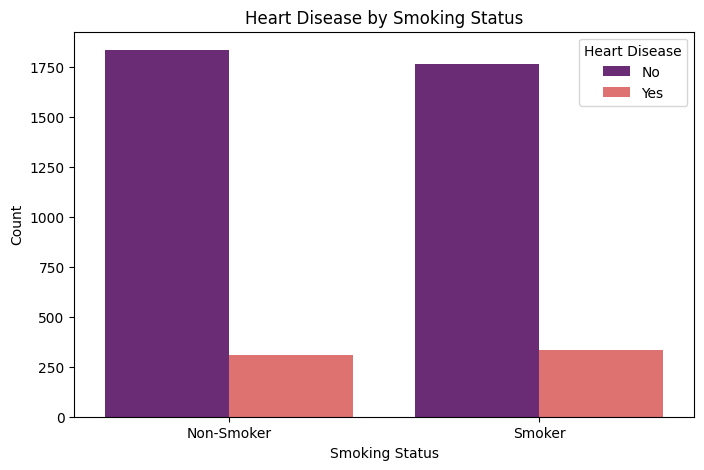

Description:The graph indicates that within both groups smoker and non smokers the number of people without heart disease is sustainably higher than those with heart disease 


In [14]:
# This graph compares a number of people with and without heart disease within both smoker and non smoker groups 
plt.figure(figsize=(8,5))
sns.countplot(x='currentSmoker', hue='TenYearCHD', data=df, palette='magma')
plt.title('Heart Disease by Smoking Status')
plt.xticks([0, 1], ['Non-Smoker', 'Smoker'])
plt.xlabel('Smoking Status')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.show()
print("Description:The graph indicates that within both groups smoker and non smokers the number of people without heart disease is sustainably higher than those with heart disease ")


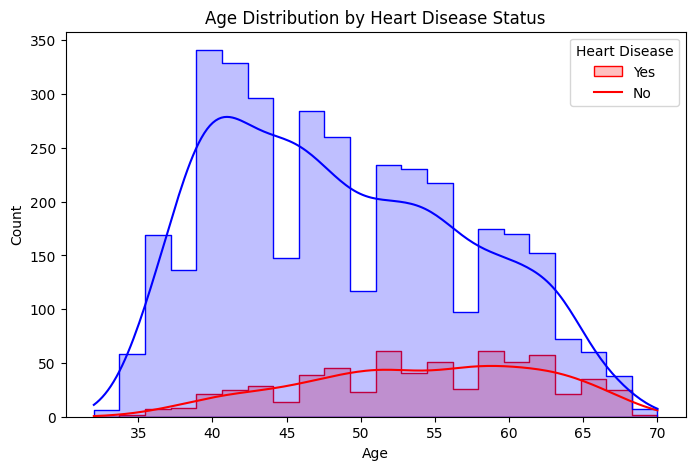

* Heart disease risk increases sharply after age 40 
* Most heart disease patients are between 45 and 65
* Younger people are at much lower risk


In [15]:
# This graph highlights that age is a potential risk factor for heart disease.
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', hue='TenYearCHD',kde=True,palette=['blue', 'red'], element='step')
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['Yes', 'No'])
plt.show()
print("* Heart disease risk increases sharply after age 40 ")
print("* Most heart disease patients are between 45 and 65")
print("* Younger people are at much lower risk")
      

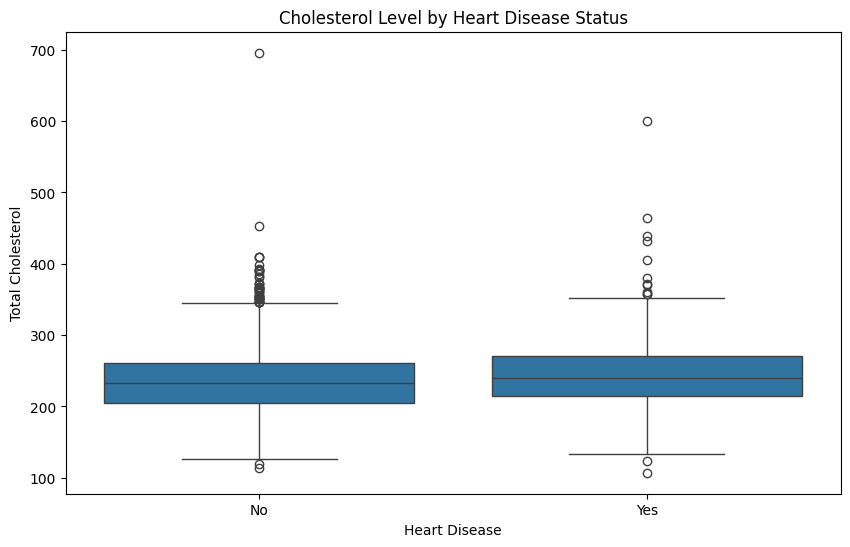

* Both groups have a similar median cholesterol level (~240)
* There are several high outliers (above 400) in both groups
* This suggests that extremely high cholesterol could be a risk factor


In [16]:
#This boxplot compares total cholesterol levels for individuals with and without heart disease.")# 
plt.figure(figsize=(10, 6))
sns.boxplot(x='TenYearCHD', y='totChol', data=df)
plt.title('Cholesterol Level by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Total Cholesterol')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()
print("* Both groups have a similar median cholesterol level (~240)")
print("* There are several high outliers (above 400) in both groups")
print("* This suggests that extremely high cholesterol could be a risk factor")


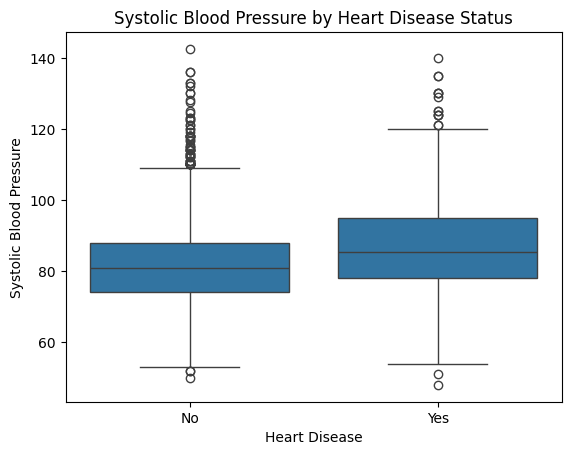

* The median diastolic blood pressure is slightly higher for persons with heart disease
* People with heart disease show slightly more variation in their diastolic blood pressure


In [17]:
#The boxplot compares diastolic blood pressure levels between people with and without heart disease.
sns.boxplot(x='TenYearCHD', y='diaBP', data=df)
plt.title('Systolic Blood Pressure by Heart Disease Status')
plt.xlabel('Heart Disease')
plt.ylabel('Systolic Blood Pressure')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()
print("* The median diastolic blood pressure is slightly higher for persons with heart disease")
print("* People with heart disease show slightly more variation in their diastolic blood pressure")


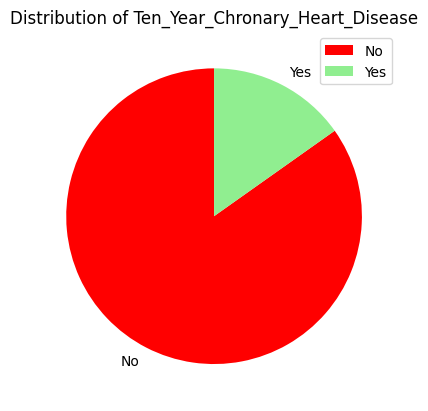

Description: This piechart shows the occurrence of Yes and No in the  10 years CHD Columns  
TenYearCHD
No     3596
Yes     644
Name: count, dtype: int64


In [18]:
# Create the Pie chart to see the 10 years CHD Columns

counts = df["TenYearCHD"].value_counts()
plt.pie(counts, labels=['No','Yes'],startangle=90 , colors =["red","lightgreen"])
plt.title("Distribution of Ten_Year_Chronary_Heart_Disease")
plt.legend(counts.index)
plt.show()
print("Description: This piechart shows the occurrence of Yes and No in the  10 years CHD Columns  ")
print(counts)

### Types of columns in the data set 

In [19]:
cat = df.select_dtypes(include=['object'])               # This will show how many categorical columns we have 
num = df.select_dtypes(include=['int64', 'float64'])     # This will show how many numerical columns we have 
print("Categorical columns: ", cat.columns)
print("Numerical columns: ", num.columns)

Categorical columns:  Index(['gender', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'TenYearCHD'],
      dtype='object')
Numerical columns:  Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')


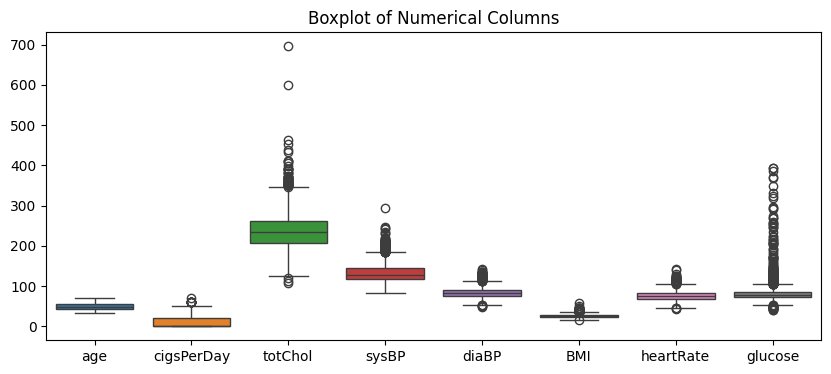

In [20]:
# Create the boxplot to check the outliers 
plt.figure(figsize=(10, 4))
sns.boxplot(num)
plt.title('Boxplot of Numerical Columns')
plt.show()

In [21]:
## function for handling outliers
def handle_outliers(df, column):
     
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)

    # Calculate IQR
    IQR = Q3 - Q1
    
    # Define lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    median = df[column].median()  # calculate the median value 
    df[column] = np.where(df[column].values > upper_bound, median, df[column])
    df[column] = np.where(df[column].values < lower_bound, median, df[column])

# function call
handle_outliers(df, 'cigsPerDay')
handle_outliers(df, 'totChol')
handle_outliers(df, 'sysBP')
handle_outliers(df, 'diaBP')
handle_outliers(df, 'BMI')
handle_outliers(df, 'heartRate')
handle_outliers(df, 'glucose')

<Axes: >

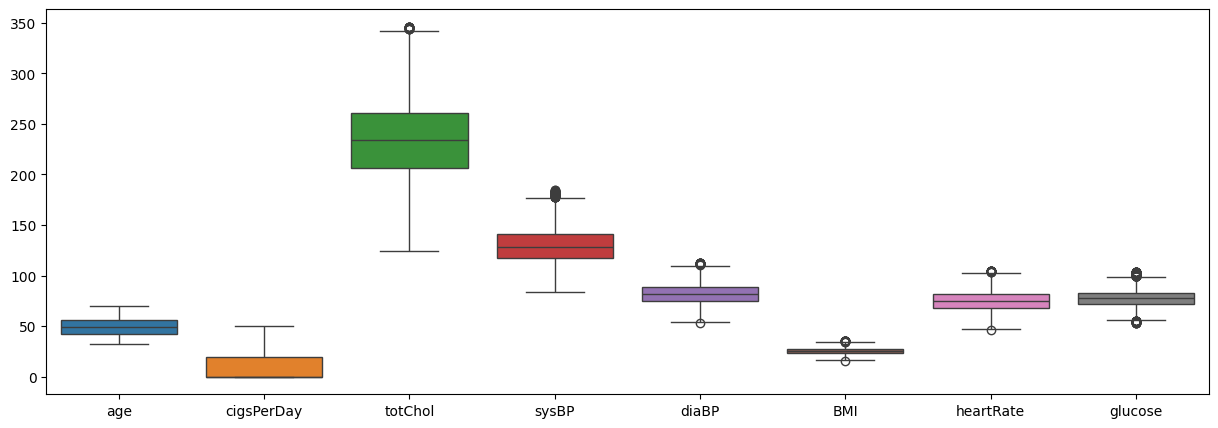

In [22]:
#  Boxplot after handling the  outliers 
plt.figure(figsize=(15, 5))
sns.boxplot(data = df)

### Types of columns in the data set 

In [23]:
cat = df.select_dtypes(include=['object'])               # This will show how many categorical columns we have 
num = df.select_dtypes(include=['int64', 'float64'])     # This will show how many numerical columns we have 
print("Categorical columns: ", cat.columns)
print("Numerical columns: ", num.columns)

Categorical columns:  Index(['gender', 'currentSmoker', 'BPMeds', 'prevalentStroke', 'prevalentHyp',
       'diabetes', 'TenYearCHD'],
      dtype='object')
Numerical columns:  Index(['age', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate',
       'glucose'],
      dtype='object')


### Encode binary variables into label encoder(e.g 0/1 columns)

In [24]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in cat:  # Here we applying for loop in above cat variables to convert categorical variable to numerical  
    df[col] = label_encoder.fit_transform(df[col])
df.head(3)
   

,gender,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0


#### here we draw the heatmap for checking the correlation between each column

<Axes: >

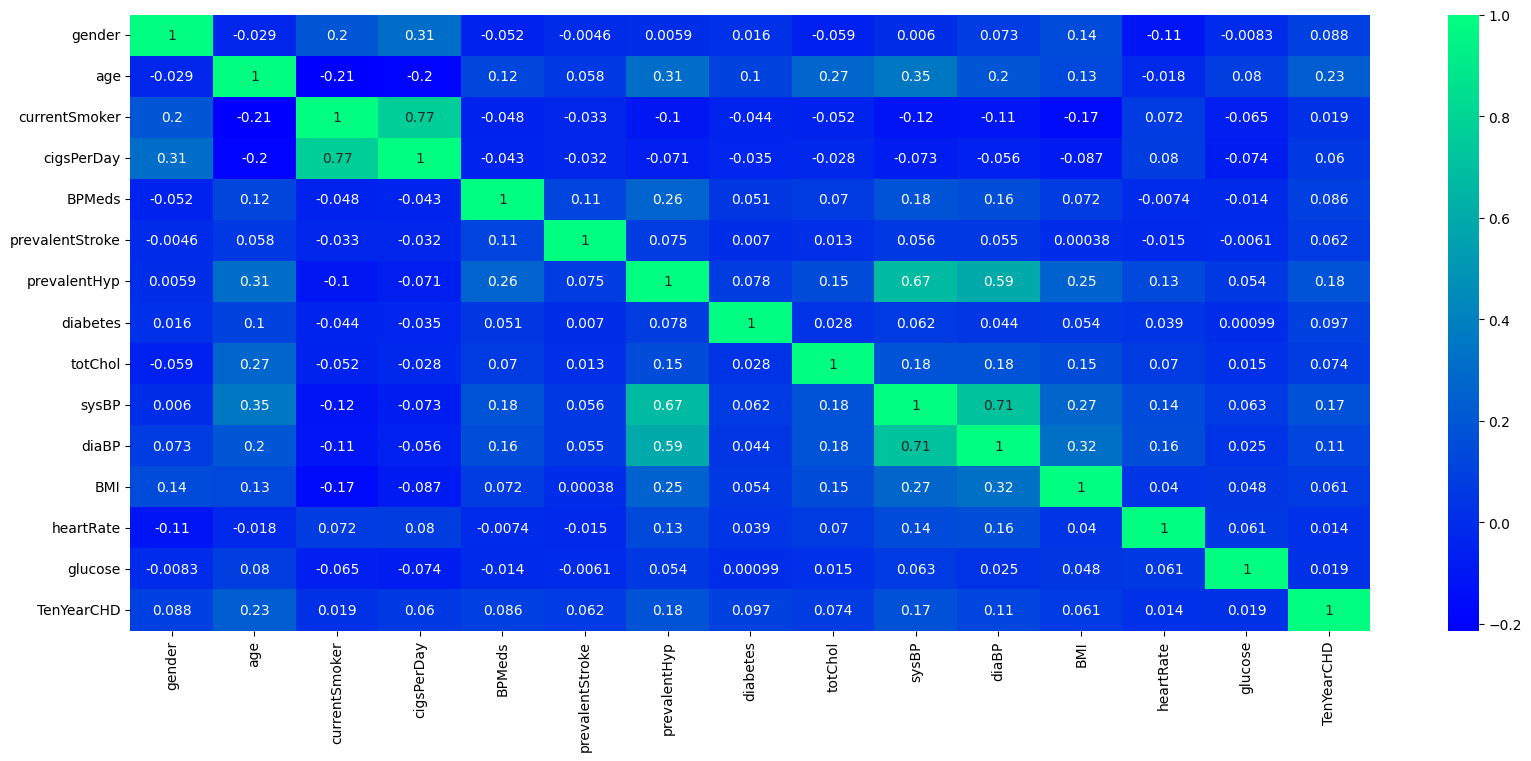

In [25]:
#df.select_dtypes(include="number").corr()
plt.figure(figsize = (20,8)) # Set figure size (width * height )
corr = df.corr()
sns.heatmap(corr,annot=True,cmap="winter")  

#####            strong positive correlation
      1.Heatmap shows currentSmoker and cigsPerDay which was ---> (+0.77)
      2.Heatmap shows sysBP and diaBP which was ---> (+0.71)
 #####          moderate positive correlation
     1.Heatmap shows prevalentHyp and sysBP	which was --->  (+0.67)
     2.Heatmap shows prevalentHyp and diaBP which was --->  (+0.59)
     3.Heatmap shows diabetes and glucose which was --->  (+0.00099)
     4.Heatmap shows age and sysBPs which was --->  (+0.35)
#####             Weak Correlation
      1. Gender with age --->(-0.029)
      2. Gender with prevalentStroke --->(-0.0046)
      3. age with heartRate --->(-0.018)

### Keeping important columns 
###### There is a no use of cigsPerDay ,diaBP, prevalentHyp  columns in the dataset so we can either do drop those columns in the dataset.
###### cigsPerDay → already covered by currentSmoker.
###### diaBP → already covered by sysBP.
###### prevalentHyp → Because sysBP and diaBP already provide the same information.



In [26]:
columns = ["gender", "age", "currentSmoker", "BPMeds", "prevalentStroke", "diabetes", "totChol", "sysBP", "BMI", "heartRate", "glucose", "TenYearCHD"]
df=df[columns]
df.head(3)

,gender,age,currentSmoker,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0,0,0,195.0,106.0,26.97,80.0,77.0,0
1,0,46,0,0,0,0,250.0,121.0,28.73,95.0,76.0,0
2,1,48,1,0,0,0,245.0,127.5,25.34,75.0,70.0,0


### Balancing the Dataset

In [27]:
from sklearn.utils import resample 
# Separate majority and minority classes 
df_majority = df[df["TenYearCHD"]==0]
df_minority = df[df["TenYearCHD"]==1]

# Upsample minority class 
df_minority_upsampled = resample(df_minority ,
                                 replace =True,   # Sample with replacement 
                                 n_samples=len(df_majority),   # To Match majority class 
                                 random_state=42)    # results shoe every time same 

# Combine majority class with upsampled minority class 
df_balanced =pd.concat([df_majority ,df_minority_upsampled])

In [28]:
df_balanced["TenYearCHD"].value_counts()

TenYearCHD
0    3596
1    3596
Name: count, dtype: int64

### Split the dataset into training and testing sets 

In [29]:
X = df_balanced.drop("TenYearCHD",axis=1) ## Here we select our TenYearCHD column as a output column and remaining 
y = df_balanced["TenYearCHD"]           ##  --column as input columns so here we drop from x and assign to y 


In [30]:
## Split the data into trainig and testing and import library of sklearn

from sklearn.model_selection import train_test_split
X_train ,X_test ,y_train ,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [31]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5394 entries, 428 to 1030
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   gender           5394 non-null   int64  
 1   age              5394 non-null   int64  
 2   currentSmoker    5394 non-null   int64  
 3   BPMeds           5394 non-null   int64  
 4   prevalentStroke  5394 non-null   int64  
 5   diabetes         5394 non-null   int64  
 6   totChol          5394 non-null   float64
 7   sysBP            5394 non-null   float64
 8   BMI              5394 non-null   float64
 9   heartRate        5394 non-null   float64
 10  glucose          5394 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 505.7 KB


### Standardize  Scaling features 

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_Scaled  = scaler.fit_transform(X_train)
X_test_Scaled = scaler.transform(X_test)

In [33]:
X_train_Scaled 

array([[-0.93883392,  0.87535027, -1.01947019, ...,  0.50680736,
        -0.96338086, -0.04157113],
       [ 1.06515111, -0.9803665 ,  0.98090166, ..., -0.3660575 ,
        -1.43481921,  2.29642067],
       [ 1.06515111,  0.29543878, -1.01947019, ...,  0.03199162,
         1.77096157, -1.21056703],
       ...,
       [ 1.06515111,  1.91919095, -1.01947019, ..., -0.72998812,
        -1.43481921,  0.06470123],
       [ 1.06515111,  1.68722635,  0.98090166, ...,  0.82808986,
        -0.02050416, -0.04157113],
       [ 1.06515111, -0.7484019 ,  0.98090166, ...,  1.39957467,
         0.45093419, -0.04157113]])

## Model Development 

>#### Here we apply all models to predict.

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
import pandas as pd

classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

for name, model in classifiers.items(): # Loop travel through each classifier
    model.fit(X_train_Scaled, y_train)  #  Train on resampled data
    Test_predictions = model.predict(X_test_Scaled)    # Make predictions on test data
    
    
    print(f"Model: {name}")
    print(f"Test_Accuracy Score Is: {accuracy_score(y_test, Test_predictions)}")
    print("Classification Report:\n", classification_report(y_test, Test_predictions))
    print("Confusion Matrix:\n", confusion_matrix(y_test, Test_predictions))
    print("*" * 50)

Model: Logistic Regression
Test_Accuracy Score Is: 0.6618464961067854
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       912
           1       0.65      0.68      0.67       886

    accuracy                           0.66      1798
   macro avg       0.66      0.66      0.66      1798
weighted avg       0.66      0.66      0.66      1798

Confusion Matrix:
 [[585 327]
 [281 605]]
**************************************************
Model: Random Forest
Test_Accuracy Score Is: 0.9638487208008899
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.93      0.96       912
           1       0.94      0.99      0.96       886

    accuracy                           0.96      1798
   macro avg       0.97      0.96      0.96      1798
weighted avg       0.97      0.96      0.96      1798

Confusion Matrix:
 [[852  60]
 [  5 881]]
*****************************

>### Get the Symmary Of all Models 

In [35]:
from sklearn.metrics import accuracy_score , f1_score , precision_score , recall_score
# Initialize models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVC': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}
# Train and evaluate models
results = []
for name, model in models.items():
    model.fit(X_train_Scaled, y_train)
    Test_predictions = model.predict(X_test_Scaled)

    
  
    Test_accuracy = accuracy_score(y_test,  Test_predictions )
    precision = precision_score(y_test,  Test_predictions )
    recall = recall_score(y_test,  Test_predictions )
    f1 = f1_score(y_test, Test_predictions )
    results.append([name,Test_accuracy, precision, recall, f1])

# Create DataFrame from results
results_df = pd.DataFrame(results, columns=['Model','Test_accuracy', 'Precision', 'Recall', 'F1-score'])

#  Automatically highlight the best model based on each metric
results_df = results_df.style.highlight_max(axis=0, color='lightgreen', subset=['Test_accuracy', 'Precision', 'Recall', 'F1-score'])

#  Display the DataFrame
results_df


,Model,Test_accuracy,Precision,Recall,F1-score
0,Logistic Regression,0.661846,0.649142,0.682844,0.665567
1,Random Forest,0.964961,0.938232,0.994357,0.965479
2,SVC,0.691324,0.672576,0.727991,0.699187
3,K-Nearest Neighbors,0.768076,0.703382,0.915350,0.795488
4,Gaussian Naive Bayes,0.549499,0.684466,0.159142,0.258242
5,Decision Tree,0.913237,0.853682,0.994357,0.918665


> **Her we use the overall best model for predictions which is Random Forest model**

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier() # initiating an object
rf.fit(X_train_Scaled, y_train)
test_predictions = rf.predict(X_test_Scaled)
print("Accuracy Score Is:",accuracy_score(y_test,test_predictions))

Accuracy Score Is: 0.9638487208008899


## Predicitive System For Checking How The Model Is Working 

In [37]:
    # First we define the function for columns in which we are working 
def predictive(gender, age, currentSmoker, BPMeds, prevalentStroke, diabetes, totChol, 
               sysBP, BMI, heartRate, glucose):
    
    ## Encode the categorical columns 
     gender_encoded = 1 if gender =="Male" else 0          # Then we encode the columns which are categorical I have only five categorical column 
     currentSmoker_encoded = 1 if currentSmoker =="Yes" else 0 
     BPMeds_encoded = 1 if BPMeds =="Yes" else 0 
     prevalentStroke_encoded = 1 if prevalentStroke	=="Yes" else 0 
     diabetes_encoded = 1 if diabetes =="Yes" else 0 

    ## Prepare Features Array 
     features = np.array([[gender, age, currentSmoker , BPMeds, prevalentStroke, diabetes, totChol, sysBP, 
                           BMI, heartRate, glucose]])  # Then we convert are columns to 2d array because ML models require input in that format
    
    ## Scalling
     scaled_features = scaler.transform(features)            # Then we do transform features columns so that all features are on the same scale

    ## Predict by model
     result = rf.predict(scaled_features)                  # Atlast we finally predict the model by Randomforest 
     return result[0]

In [38]:
df.sample(4)

,gender,age,currentSmoker,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
2221,1,60,1,0,0,0,288.0,122.5,22.13,80.0,88.0,0
1542,0,63,0,0,0,0,293.0,128.0,30.47,60.0,96.0,0
2239,1,39,1,0,0,0,255.0,108.0,23.90,67.0,70.0,0
74,0,44,1,0,0,0,221.0,110.0,22.16,64.0,83.0,1


In [42]:
# Test 1 In this test we have pass all the input variables to row value of the dataset to see how our model is predicting our output value :

gender = float(input("Choose the Gender As \n 1 for Male: \n 0 for Female:"))
age = int(input("Enter the Age :"))               
currentSmoker = float(input("Choose the currentSmoker As \n 1 for Yes: \n 0 for No:"))     
BPMeds  = float(input("Choose whether the individual is on Blood Pressure Medication  He/She take  As \n 1 for Yes: \n 0 for No:"))  
prevalentStroke = float(input("Choose whether the individual has had a prevalentStroke or not   As \n 1 for Yes: \n 0 for No:")) 
diabetes  = float(input("Choose the Person has diabetes or not  As \n 1 for Yes: \n 0 for No:"))   
totChol = float(input("Enter the Total Cholestrol level :"))     
sysBP  = float(input("Enter the Systolic Blood Pressure :"))      
BMI  = float(input("Enter the Body Mass Index  :"))    
heartRate = float(input("Enter the Heart Rate :"))  
glucose  = float(input("Enter the Glucose Level  :")) 

result =predictive(gender, age, currentSmoker,BPMeds, prevalentStroke, diabetes, totChol,   #  passing the User input to the aboive predective function 
                                        sysBP, BMI, heartRate, glucose)
if result == 1:
    print("⚠️ Person has a heart disease .")
else:
    print("✅ Person does not have a heart disease .")

Choose the Gender As 
 1 for Male: 
 0 for Female: 0
Enter the Age : 51
Choose the currentSmoker As 
 1 for Yes: 
 0 for No: 0
Choose whether the individual is on Blood Pressure Medication  He/She take  As 
 1 for Yes: 
 0 for No: 0
Choose whether the individual has had a prevalentStroke or not   As 
 1 for Yes: 
 0 for No: 0
Choose the Person has diabetes or not  As 
 1 for Yes: 
 0 for No: 0
Enter the Total Cholestrol level : 226
Enter the Systolic Blood Pressure : 131
Enter the Body Mass Index  : 24.36
Enter the Heart Rate : 75
Enter the Glucose Level  : 73


✅ Person does not have a heart disease .


##### > So here we can see our model is predicting true value as a output so we can say our model is working good 

In [40]:
df.sample(3)

,gender,age,currentSmoker,BPMeds,prevalentStroke,diabetes,totChol,sysBP,BMI,heartRate,glucose,TenYearCHD
1696,0,51,0,0,0,0,226.0,131.0,24.36,75.0,73.0,0
1998,0,51,1,0,0,0,240.0,180.0,25.33,68.0,80.0,0
387,0,55,0,0,0,0,308.0,124.0,31.82,75.0,84.0,0


#### Uing Pickle Library To Save This Model

In [41]:
import pickle 
pickle.dump(rf,open("Heart_disease_Model.pkl","wb"))
pickle.dump(scaler,open("Scaler.pkl","wb"))


### Model Completion Succesfully

 Model has been trained and saved successfully.

---> The dataset has been cleaned and preprocessed.

---> The dataset has been split into training and testing sets with a test size of 25%.

---> Logistic Regression ,Random Forest ,Support Vector Classoifier ,K-Nearest Neighbors  ,Decision Tree  ,Naive Bayes have been evaluated using accuracy_score ,r2_score ,mean_absolute_error ,classification_report ,confusion_matrix.

---> The model with the highest accuracy score is approximately **95% ~ 96%**

---> The model can now be used to predict Heart_Disease based on the provided features.

---> The model has been saved to a pickle file named "Heart_Disease_Model.pkl". 

--->This file can be used to load the trained model and make predictions on new data.

> **Now Model Is Ready To Host** 